### **Titanic project | WiDS - Winter Analytics Project | Analytics Club**

Author: Mayank Apte

Mentor: Siddharth Varma

**Basic overview:**

This project aims to explore the titanic dataset and predict the survival of passengers whose information is given in the 'test.csv' file.

The process is outlined below:

1. Finding out the characteristics of data
2. EDA - histograms, boxplots and violin plots
3. Value counts, Missing values and NA entries 
4. Feature engineering using one hot encoding
5. Seaborn heatmap to find correlations
6. Explore interesting correlations based on heatmap results
7. Data scaling and normalization
8. Implementation of ML models
9. Accuracy score summary of different classification techniques

Importing the necessary libraries:

In [207]:

#IMPORT LIBRARIES

# linear algebra
import numpy as np 

# data processing
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import ConfusionMatrixDisplay

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Loading the data using pandas command:

In [208]:
#LOAD THE DATA

DF_train = pd.read_csv("train.csv")
df_train = DF_train.copy()

DF_test = pd.read_csv("test.csv")
df_test = DF_test.copy()

all_data = pd.concat([df_train, df_test])


**1) Finding out the characteristics of data**

In [209]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
df_train.info()

df_train = df_train.drop(['PassengerId'], axis = 1)
all_data = all_data.drop(['PassengerId'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [211]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Features:*
1. **Categorical:**

    a. PassengerId\
    b. Pclass\
    c. Name\
    d. Sex\
    e. Ticket\
    f. Cabin\
    g. Embarked
    
Thus a total of 7 columns are categorical variables.
    
    
2. **Numeric:**

    a. Age\
    b. SibSp: no of siblings/spouses aboard\
    c. Parch: no of parents/children aboard\
    c. Fare

3. **Target:**

    Survived
    
A total of 4 columns are numeric.

**2. EDA - histograms, boxplots and violin plots**

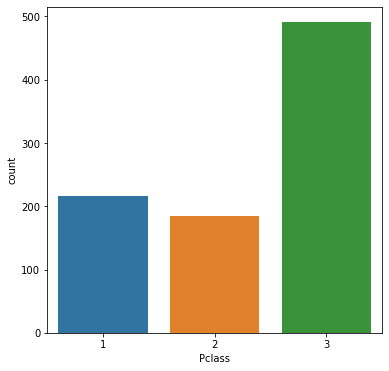

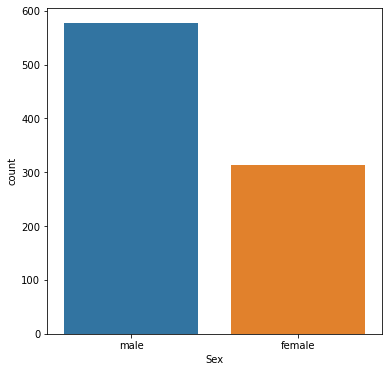

In [212]:
##DISCRETE VARIABLE
#Plotting count plots for discrete variables:

df_cont = df_train[['Pclass', 'Sex']]
def countplot(string):
    fig = plt.subplots(figsize=(6,6))
    ax = sns.countplot(x=string, data=df_cont)
    return

countplot("Pclass")
countplot("Sex")

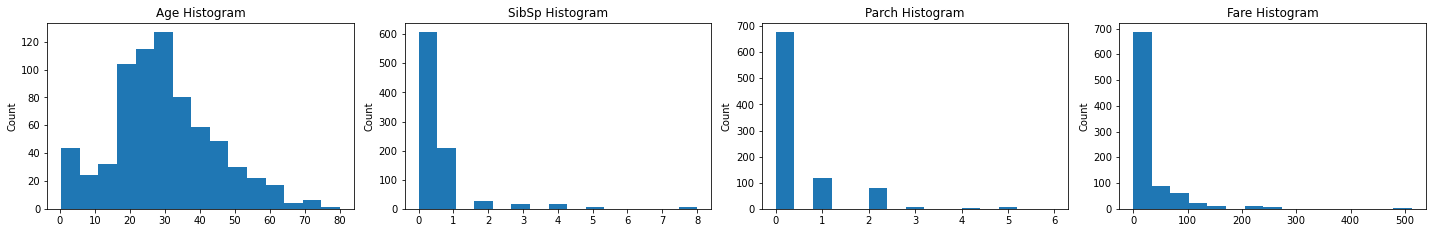

In [213]:
#EXPLORATORY DATA ANALYSIS

# EDA : Histogram - for continuous variables

df_num = df_train[['Age', 'SibSp', 'Parch', 'Fare']]

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,12))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=15,ax=ax, grid = False)
        ax.set_title(var_name+" Histogram")
        plt.ylabel("Count")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_histograms(df_num, df_num.columns, 4, 4)

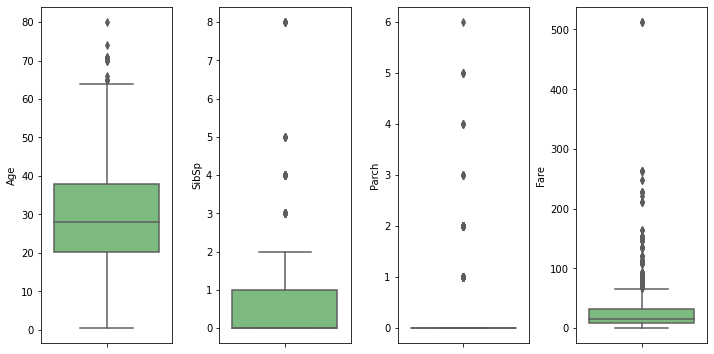

In [214]:
# EDA: Box plot - for continuous variables

df_cont = df_train[['Age', 'SibSp', 'Parch', 'Fare']]

fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (10, 5))
index = 0
ax = ax.flatten()

for col, value in df_cont.items():
    sns.boxplot(y=col, data=df_cont, ax=ax[index], palette = 'Greens')
    index += 1
plt.tight_layout(pad = 1, w_pad=0.7, h_pad=5.0)

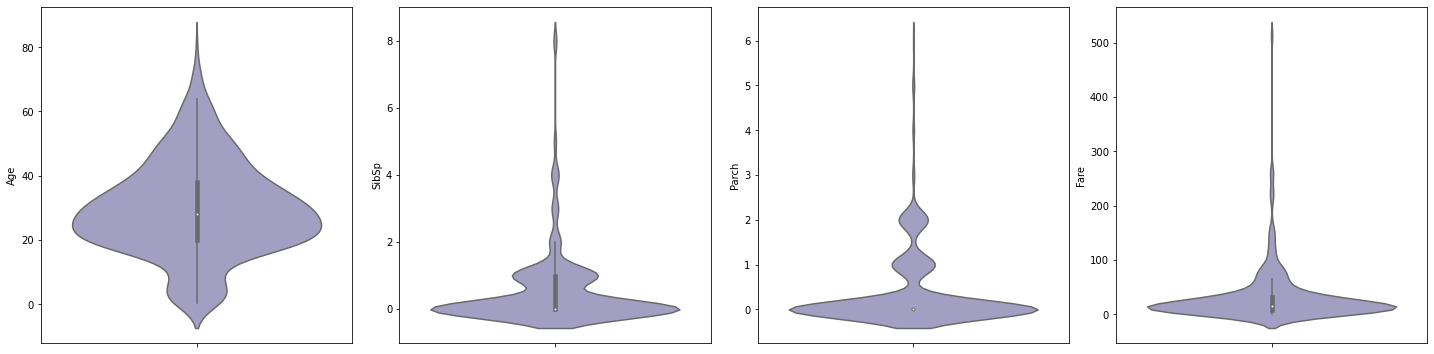

In [215]:
#EDA : Violin plot - for continuous variables

df_cont = df_num

fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (20, 5))
index = 0
ax = ax.flatten()

for col, value in df_cont.items():
    sns.violinplot(y=col, data=df_cont, ax=ax[index], palette = 'Purples')
    index += 1
plt.tight_layout(pad = 1, w_pad=0.7, h_pad=5.0)

**3. Value counts, Missing values and NA entries**

In [216]:
df_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [217]:
#SEARCHING FOR MISSING VALUES
#code to find out missing values in terms of percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


Since cabin contains 77% of missing data, we will drop that column.

In [218]:
df_train = df_train.drop(['Cabin'], axis = 1)

In [219]:
def set_random_values(feature):
    random_sample = df_train[feature].dropna().sample(df_train[feature].isnull().sum())
    random_sample.index = df_train[df_train[feature].isnull()].index
    df_train.loc[df_train[feature].isnull(), feature]= random_sample

num_col= ['Age', 'Embarked']
for col in num_col:
    set_random_values(col)

In [220]:
#SEARCHING FOR MISSING VALUES
#code to find out missing values in terms of percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Embarked,0,0.0


Thus, all the missing values are now taken care of.

In [221]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


As the Name and Ticket column does not provide any useful insight, we drop the columns:

In [222]:
df_train = df_train.drop(['Ticket'], axis = 1)

In [223]:
df_train = df_train.drop(['Name'], axis = 1)

In [224]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**4) Feature engineering using one hot encoding**

In [225]:
#Creating dummy variables:
df = df_train

#creating an array for updating dataframe
categorical_column = ['Sex', 'Embarked', 'Pclass']
df_updated = pd.get_dummies(df, columns = categorical_column)
df_train = df_updated

df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


Now, our dataset is clean and ready for obtaining correlation matrix.

**5) Seaborn heatmap to find correlations**

<AxesSubplot:>

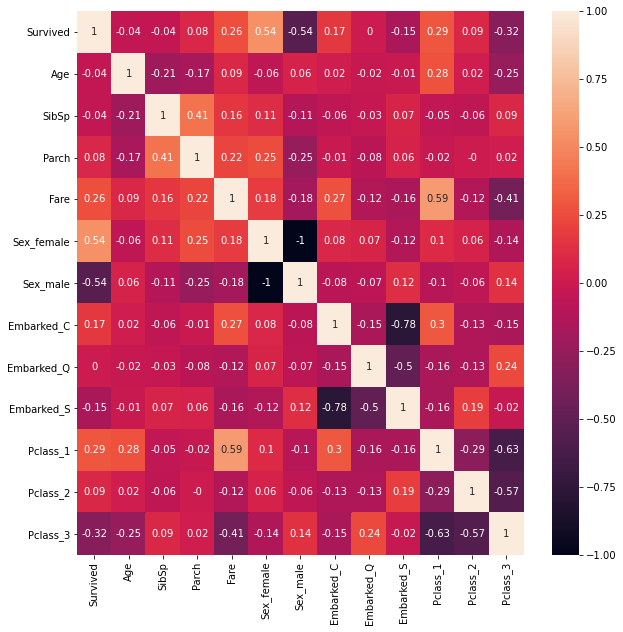

In [226]:
#implementing seaborn library for heatmap
df_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(round(df_train.corr(),2), annot = True)

**6) Explore interesting correlations based on heatmap results:**

**1. Survival based on Gender:**

*As we can see, the correlation between female and survival is 0.54 while that between male passengers and survival is -0.54.*

*Thus, the number of female who survived is much more than male.*

**2. Does Fare price influence survival?**

*Correlation between fare and survival is 0.26 which indicates a weak correlation.*

*Thus, fare price does not influence survival.*

**3. Scatter plot between age and fare price:**

Text(0, 0.5, 'Fare')

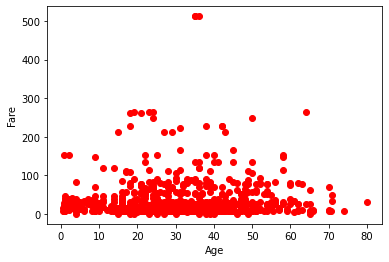

In [227]:
plt.scatter(df_train['Age'], df_train['Fare'], c = "red")
plt.xlabel("Age")
plt.ylabel("Fare")

*Thus, there seems to be no strong correlation between fare price and age, this is also shown by the heatmap with a very weak correlation of 0.07.* 

**Since the test file was given seperately, performing the same operations as above for test data:**

In [228]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [229]:
#SEARCHING FOR MISSING VALUES
#code to find out missing values in terms of percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent_1 = df_test.isnull().sum()/df_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


Since Cabin has 77.8% of missing data, it would be wise to drop that column. Additionally, the following columns are dropped:

    1. PassengerId
    2. Name
    3. Ticket

In [230]:
df_test = df_test.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Name', 'PassengerId','Ticket'], axis = 1)

In [231]:
#assigning random values to Age and Fare column
def set_random_values(feature):
    random_sample = df_test[feature].dropna().sample(df_test[feature].isnull().sum())
    random_sample.index = df_test[df_test[feature].isnull()].index
    df_test.loc[df_test[feature].isnull(), feature]= random_sample

num_col= ['Age', 'Fare']
for col in num_col:
    set_random_values(col)

In [232]:
#SEARCHING FOR MISSING VALUES
#code to find out missing values in terms of percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent_1 = df_test.isnull().sum()/df_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


Now, the test data is also free from missing values.

In [233]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [234]:
#Feature engineering: one hot encoding by using dummy variables method

#Creating dummy variables:
df = df_test

#creating an array for updating dataframe
categorical_column = ['Sex', 'Embarked', 'Pclass']
df_updated = pd.get_dummies(df, columns = categorical_column)
df_test = df_updated

df_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


**7) Data scaling and normalization**

In [235]:
#normalizing continuous variables in test and training data:
cont_variables = ['Age', 'Fare']

#for training set:
df_norm_train = df_train.copy()
for col_var in cont_variables:
    df_norm_train[col_var] = MinMaxScaler().fit_transform(np.array(df_norm_train[col_var]).reshape(-1,1))
    
#for test set:
df_norm_test = df_test.copy()
for col_var in cont_variables:
    df_norm_test[col_var] = MinMaxScaler().fit_transform(np.array(df_norm_test[col_var]).reshape(-1,1))

In [236]:
df_norm_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0.271174,1,0,0.014151,0,1,0,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0,1,0,0
2,1,0.321438,0,0,0.015469,1,0,0,0,1,0,0,1
3,1,0.434531,1,0,0.103644,1,0,0,0,1,1,0,0
4,0,0.434531,0,0,0.015713,0,1,0,0,1,0,0,1


In [237]:
df_norm_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.452723,0,0,0.015282,0,1,0,1,0,0,0,1
1,0.617566,1,0,0.013663,1,0,0,0,1,0,0,1
2,0.815377,0,0,0.018909,0,1,0,1,0,0,1,0
3,0.353818,0,0,0.016908,0,1,0,0,1,0,0,1
4,0.287881,1,1,0.023984,1,0,0,0,1,0,0,1


**8. Implementation of ML models:**

**MODEL BUILDING:**

In [238]:
y_train = df_norm_train['Survived']
X_train = df_norm_train.drop(['Survived'], axis = 1)

X_test = df_norm_test

**1. LOGISTIC REGRESSION**

In [239]:
from sklearn.linear_model import LogisticRegression

#Using Logistic Regression:
logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)

LogisticRegression()

In [240]:
#Prediction:
logreg_pred = logreg_model.predict(X_test)

In [241]:
#Accuracy:
logreg = LogisticRegression(random_state = 3)
logreg_cv = cross_val_score(logreg,X_train,y_train, cv = 10)
print(logreg_cv)
print(logreg_cv.mean())

[0.78888889 0.79775281 0.76404494 0.79775281 0.78651685 0.78651685
 0.79775281 0.76404494 0.83146067 0.79775281]
0.7912484394506867


In [242]:
logreg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**2. RANDOM FOREST CLASSIFIER:**

In [243]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [244]:
#Prediction:
rf_pred = rf_model.predict(X_test)

In [245]:
#Accuracy:
rf = RandomForestClassifier(random_state = 1)
rf_cv = cross_val_score(rf,X_train,y_train, cv = 10)
print(rf_cv)
print(rf_cv.mean())

[0.75555556 0.79775281 0.73033708 0.82022472 0.83146067 0.83146067
 0.82022472 0.78651685 0.83146067 0.83146067]
0.803645443196005


In [246]:
rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**3. DECISION TREE CLASSIFIER:**

In [247]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [248]:
#Prediction:
dt_pred = dt_model.predict(X_test)

In [249]:
#Accuracy:
dt = DecisionTreeClassifier(random_state = 2)
dt_cv = cross_val_score(rf,X_train,y_train, cv = 10)
print(dt_cv)
print(dt_cv.mean())

[0.75555556 0.79775281 0.73033708 0.82022472 0.83146067 0.83146067
 0.82022472 0.78651685 0.83146067 0.83146067]
0.803645443196005


In [250]:
dt_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

**4. SVC CLASSIFIER:**

In [251]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [252]:
#Prediction:
svc_pred = clf.predict(X_test)

In [253]:
#Accuracy:
svc = SVC(random_state = 2)
svc_cv = cross_val_score(svc,X_train,y_train, cv = 10)
print(svc_cv)
print(svc_cv.mean())

[0.8        0.79775281 0.76404494 0.84269663 0.84269663 0.78651685
 0.80898876 0.75280899 0.84269663 0.82022472]
0.8058426966292135


In [254]:
svc_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**9) Accuracy score summary of different classification techniques:**

In [255]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC Classifier'],
    'Accuracy (%)' :[logreg_cv.mean()*100, rf_cv.mean()*100,dt_cv.mean()*100 , svc_cv.mean()*100]
})
models

,Model,Accuracy (%)
0,Logistic Regression,79.124844
1,Random Forest,80.364544
2,Decision Tree,80.364544
3,SVC Classifier,80.584270


*Thus, random forest or decision tree classifier could be used for obtaining the predicted values of the target variable i.e. Survival*